In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from helper_functions import RBF,  MSE

In [2]:
%matplotlib notebook

In [3]:
def lorenz(t, X, sigma, beta, rho):
    #The Lorenz equations
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

In [4]:
# Domain
N = 10000
t_end = 10
t = np.linspace(0, t_end, N+1)

#Lorenz attracor values
sigma_val = 10
beta_val = 8/3
rho_val = 28

#initializing values
u0, v0, w0 = 10,10,10
x0 = np.array([u0,v0,w0])

# Embedding parameters
dt = 100*t[1]
n = int(dt/t[1])

In [5]:
# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, t_end), x0, args=(sigma_val, beta_val, rho_val),dense_output=True)
x, y, z = soln.sol(t)

<IPython.core.display.Javascript object>


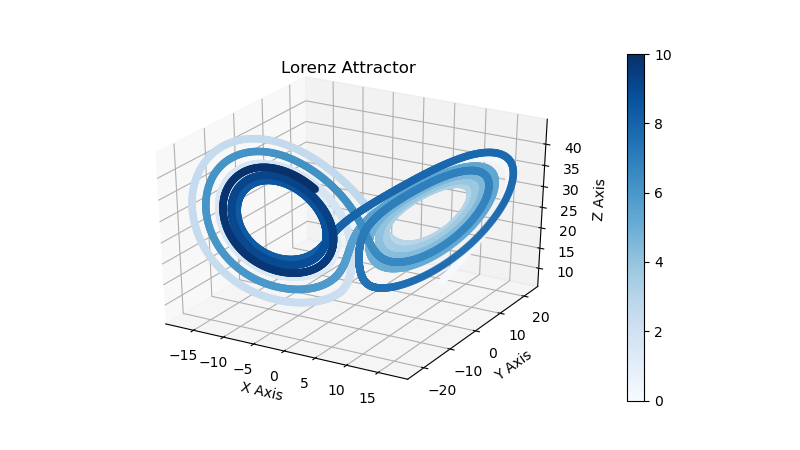

<IPython.core.display.Javascript object>


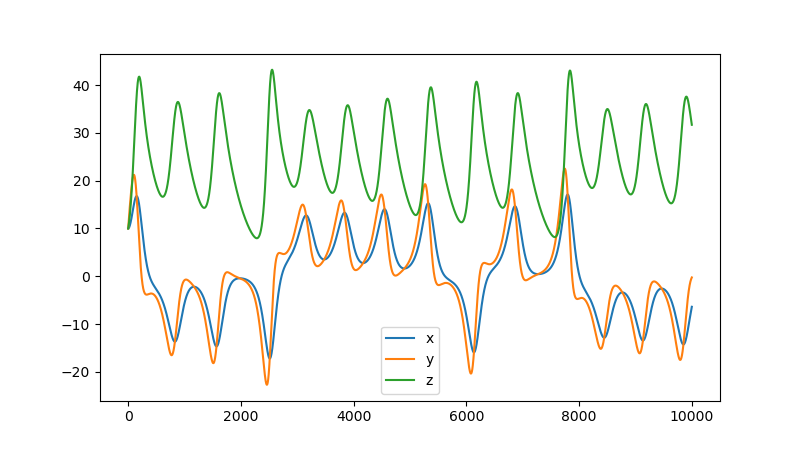

In [40]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

sc = ax.scatter(x, y, z, c=t,cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.colorbar(sc)

plt.figure(figsize=(8,4.5))
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')
plt.legend()

<IPython.core.display.Javascript object>


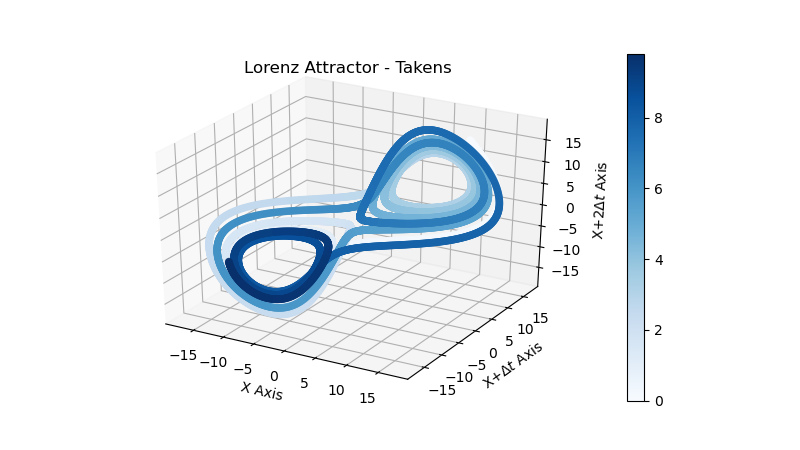

In [7]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')


sc = ax.scatter(x[:-2*n], x[n:-n], x[2*n:], c=t[:-2*n],cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")
ax.set_title("Lorenz Attractor - Takens")

plt.colorbar(sc)

<IPython.core.display.Javascript object>


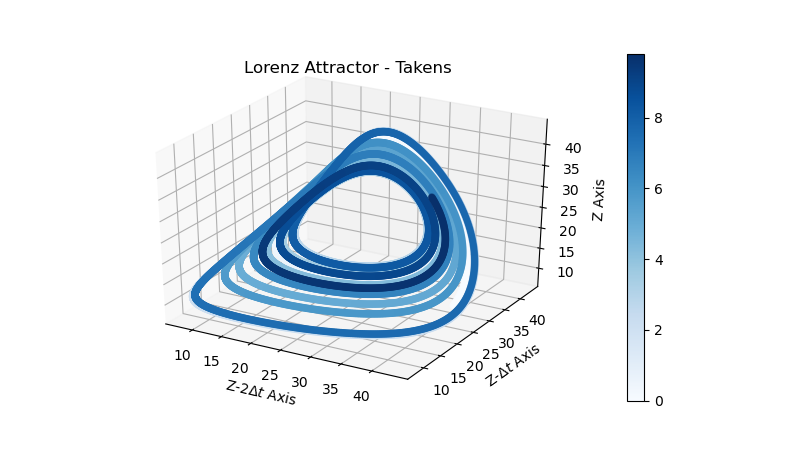

In [8]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

sc = ax.scatter(z[2*n:], z[n:-n], z[:-2*n], c=t[:-2*n],cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("Z-$2\Delta t$ Axis")
ax.set_ylabel("Z-$\Delta t$ Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor - Takens")

plt.colorbar(sc)

In [46]:
x01 = x[:-3*n]
x02 = x[n:-2*n]
x03 = x[2*n:-n]
x11 = x02
x12 = x03
x13 = x[3*n:]
X0 = np.vstack([x01, x02, x03]).T
X1 = np.vstack([x11, x12, x13]).T
V = (X1 - X0)/dt

<IPython.core.display.Javascript object>


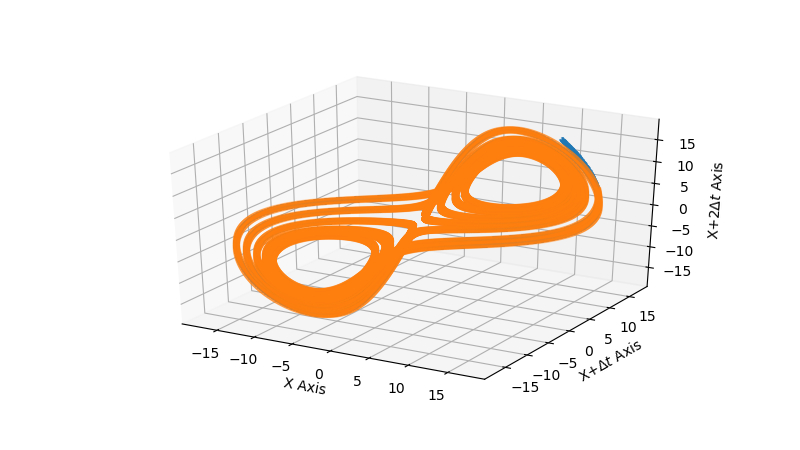

Text(0.5, 0, 'X+$2\\Delta t$ Axis')

In [10]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
ax.scatter(X0[:,0], X0[:,1], X0[:,2], marker='+', alpha=0.5)
ax.scatter(X1[:,0], X1[:,1], X1[:,2], marker='x', alpha=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")

<IPython.core.display.Javascript object>


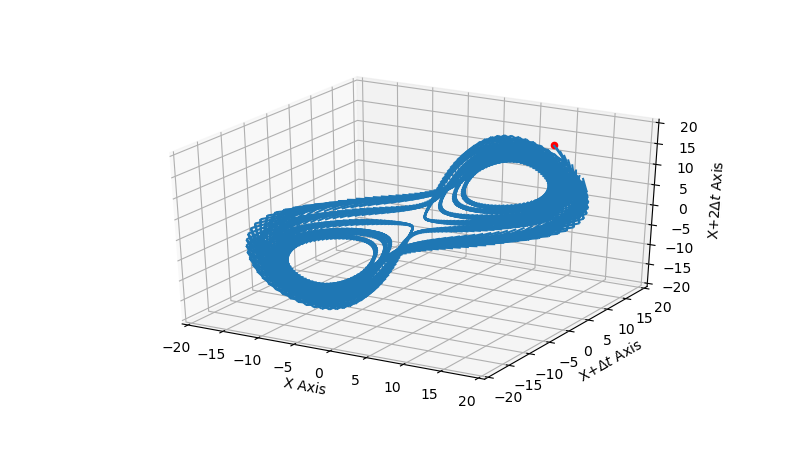

(-20.0, 20.0)

In [47]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
plt.quiver(x01[::10], x02[::10], x03[::10], V[::10,0], V[::10,1], V[::10,2],length=0.1,cmap='jet')
ax.scatter(x01[0], x02[0], x03[0],c='red')
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)

8.816412320667681e-05


<IPython.core.display.Javascript object>


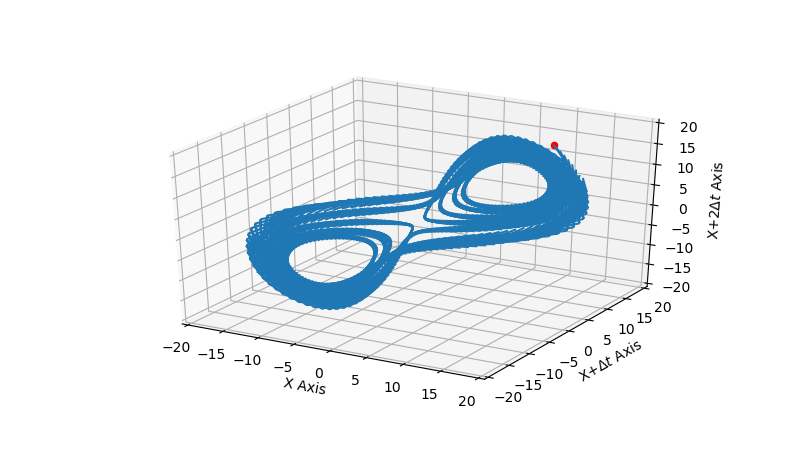

(-20.0, 20.0)

In [65]:
rbf = RBF(500, 5)
rbf.fit(X0, V)
VHAT = rbf.predict(X0)
print(MSE(V, VHAT))
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
plt.quiver(x01[::10], x02[::10], x03[::10], VHAT[::10,0], VHAT[::10,1], VHAT[::10,2],length=0.1,cmap='jet')
ax.scatter(x01[0], x02[0], x03[0],c='red')
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)

0.0023721985692080417


<IPython.core.display.Javascript object>


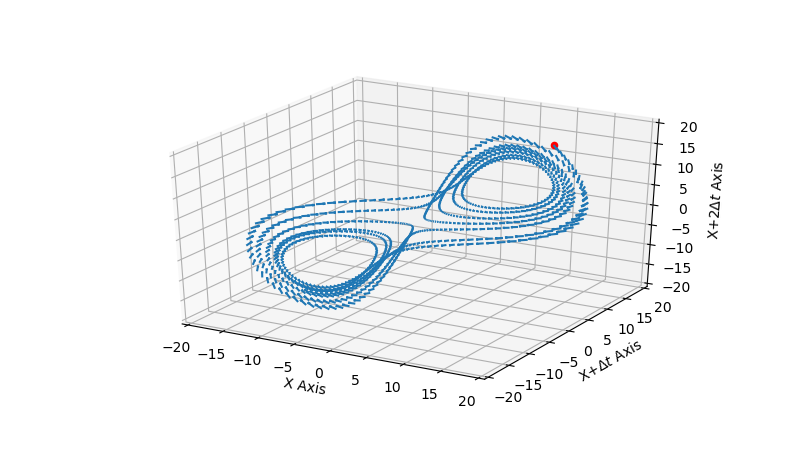

(-20.0, 20.0)

In [45]:
rbfx = RBF(50, 20)
rbfx.fit(X0, X1)
Xnext = rbfx.predict(X0)
print(MSE(X1, Xnext))
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
VHAT = Xnext - X0
plt.quiver(x01[::10], x02[::10], x03[::10], VHAT[::10,0], VHAT[::10,1], VHAT[::10,2],length=0.1,cmap='jet')
ax.scatter(x01[0], x02[0], x03[0],c='red')
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)

In [66]:
x0r = np.array([x01[0], x02[0], x03[0]])
soln_rbf = solve_ivp(lambda t, x: rbf.predict(np.array([x,x]))[0], (0, t_end), x0r, dense_output=True)
#soln_rbf = solve_ivp(lambda t, x: lorenz(t, x, sigma_val, beta_val, rho_val), (0, t_end), x0r, dense_output=True)
xr, yr, zr = soln_rbf.sol(t)

<IPython.core.display.Javascript object>


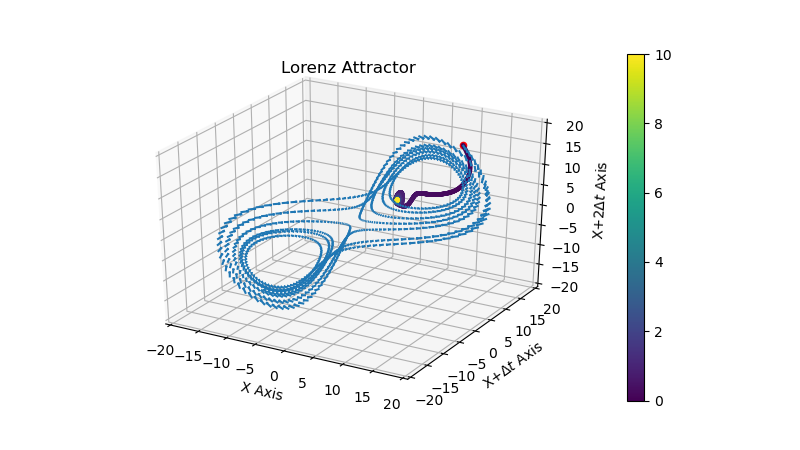

In [67]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
plt.quiver(x01[::10], x02[::10], x03[::10], VHAT[::10,0], VHAT[::10,1], VHAT[::10,2],length=0.01)
sc = ax.scatter(xr, yr, zr, c=t,marker='.')
ax.scatter(x0r[0], x0r[1], x0r[2],c='red')
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")
ax.set_title("Lorenz Attractor")
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)
plt.colorbar(sc)